In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import time
import calendar
import numpy as np
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("Crime_Data_from_2010_to_Present.csv", na_values='NaN')

In [3]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [4]:
data.dtypes

DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Weapon Used Code          float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                    object
Cross Street               object
Location                   object
dtype: object

In [5]:
data['Date Reported'] = pd.to_datetime(data['Date Reported'], format = '%m/%d/%Y')
data['Year'] = data['Date Reported'].dt.year
data['Month'] = (data['Date Reported'].dt.month).apply(lambda x: calendar.month_abbr[x])
data['Month'] = pd.Categorical(data['Month'], categories = ['Jan', 'Feb', 'Mar', "Apr", 'May', 'Jun', 'Jul', 'Aug', "Sep", 'Oct','Nov','Dec'], ordered = True)
data['Weekday'] = data['Date Reported'].dt.weekday_name
data['Weekday'] = pd.Categorical(data['Weekday'], categories = ['Monday','Tuesday',"Wednesday", 'Thursday', "Friday", "Saturday","Sunday"], ordered = True)
data.dtypes

DR Number                          int64
Date Reported             datetime64[ns]
Date Occurred                     object
Time Occurred                      int64
Area ID                            int64
Area Name                         object
Reporting District                 int64
Crime Code                         int64
Crime Code Description            object
MO Codes                          object
Victim Age                       float64
Victim Sex                        object
Victim Descent                    object
Premise Code                     float64
Premise Description               object
Weapon Used Code                 float64
Weapon Description                object
Status Code                       object
Status Description                object
Crime Code 1                     float64
Crime Code 2                     float64
Crime Code 3                     float64
Crime Code 4                     float64
Address                           object
Cross Street    

In [6]:
crime = data[data['Date Reported'].dt.year == 2017]

In [7]:
crime.Year.count()

233131

In [8]:
#month 
month = crime.groupby('Month')[['Month']].count()
month.columns = ['Total']
month.reset_index(inplace=True)

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

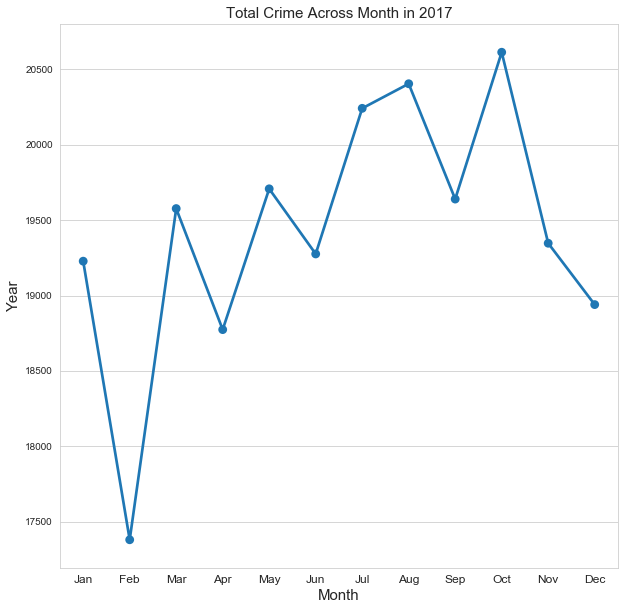

In [9]:
fg, ax = plt.subplots(figsize = (10,10))
_ = sns.pointplot(x = 'Month',
             y = 'Total',
             data = month)
plt.title('Total Crime Across Month in 2017', size = 15)
plt.xlabel('Month', size = 15)
plt.ylabel('Year', size = 15)
_.set_xticklabels(_.get_xticklabels(), size = 12)

In [10]:
#Week
#month 
week = crime.groupby('Weekday')[['Weekday']].count()
week.columns = ['Total']
week.reset_index(inplace=True)

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

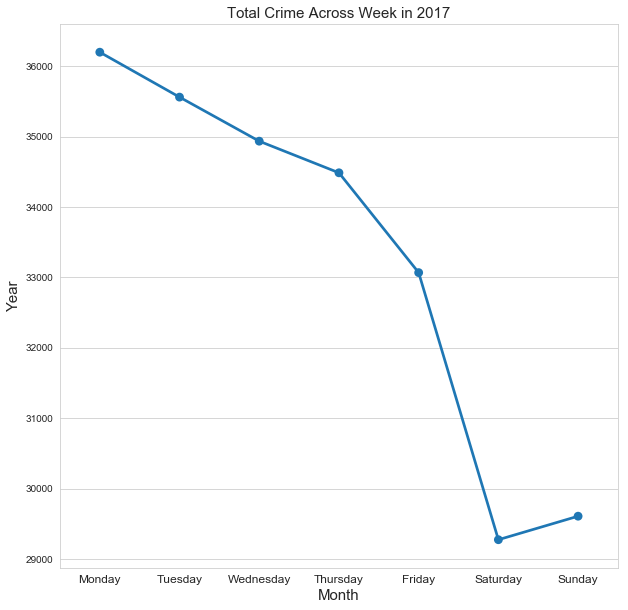

In [11]:
fg, ax = plt.subplots(figsize = (10,10))
_ = sns.pointplot(x = 'Weekday',
             y = 'Total',
             data = week)
plt.title('Total Crime Across Week in 2017', size = 15)
plt.xlabel('Month', size = 15)
plt.ylabel('Year', size = 15)
_.set_xticklabels(_.get_xticklabels(), size = 12)

In [12]:
top_crime = crime.groupby('Crime Code Description')['Crime Code Description'].count().sort_values(ascending = False)
top_crime = top_crime[:10]
top_crime

Crime Code Description
BATTERY - SIMPLE ASSAULT                                        19160
VEHICLE - STOLEN                                                18926
BURGLARY FROM VEHICLE                                           18286
BURGLARY                                                        15321
THEFT PLAIN - PETTY ($950 & UNDER)                              14854
THEFT OF IDENTITY                                               13159
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    12884
INTIMATE PARTNER - SIMPLE ASSAULT                               12630
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  11039
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                 10713
Name: Crime Code Description, dtype: int64

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text xticklabel objects>)

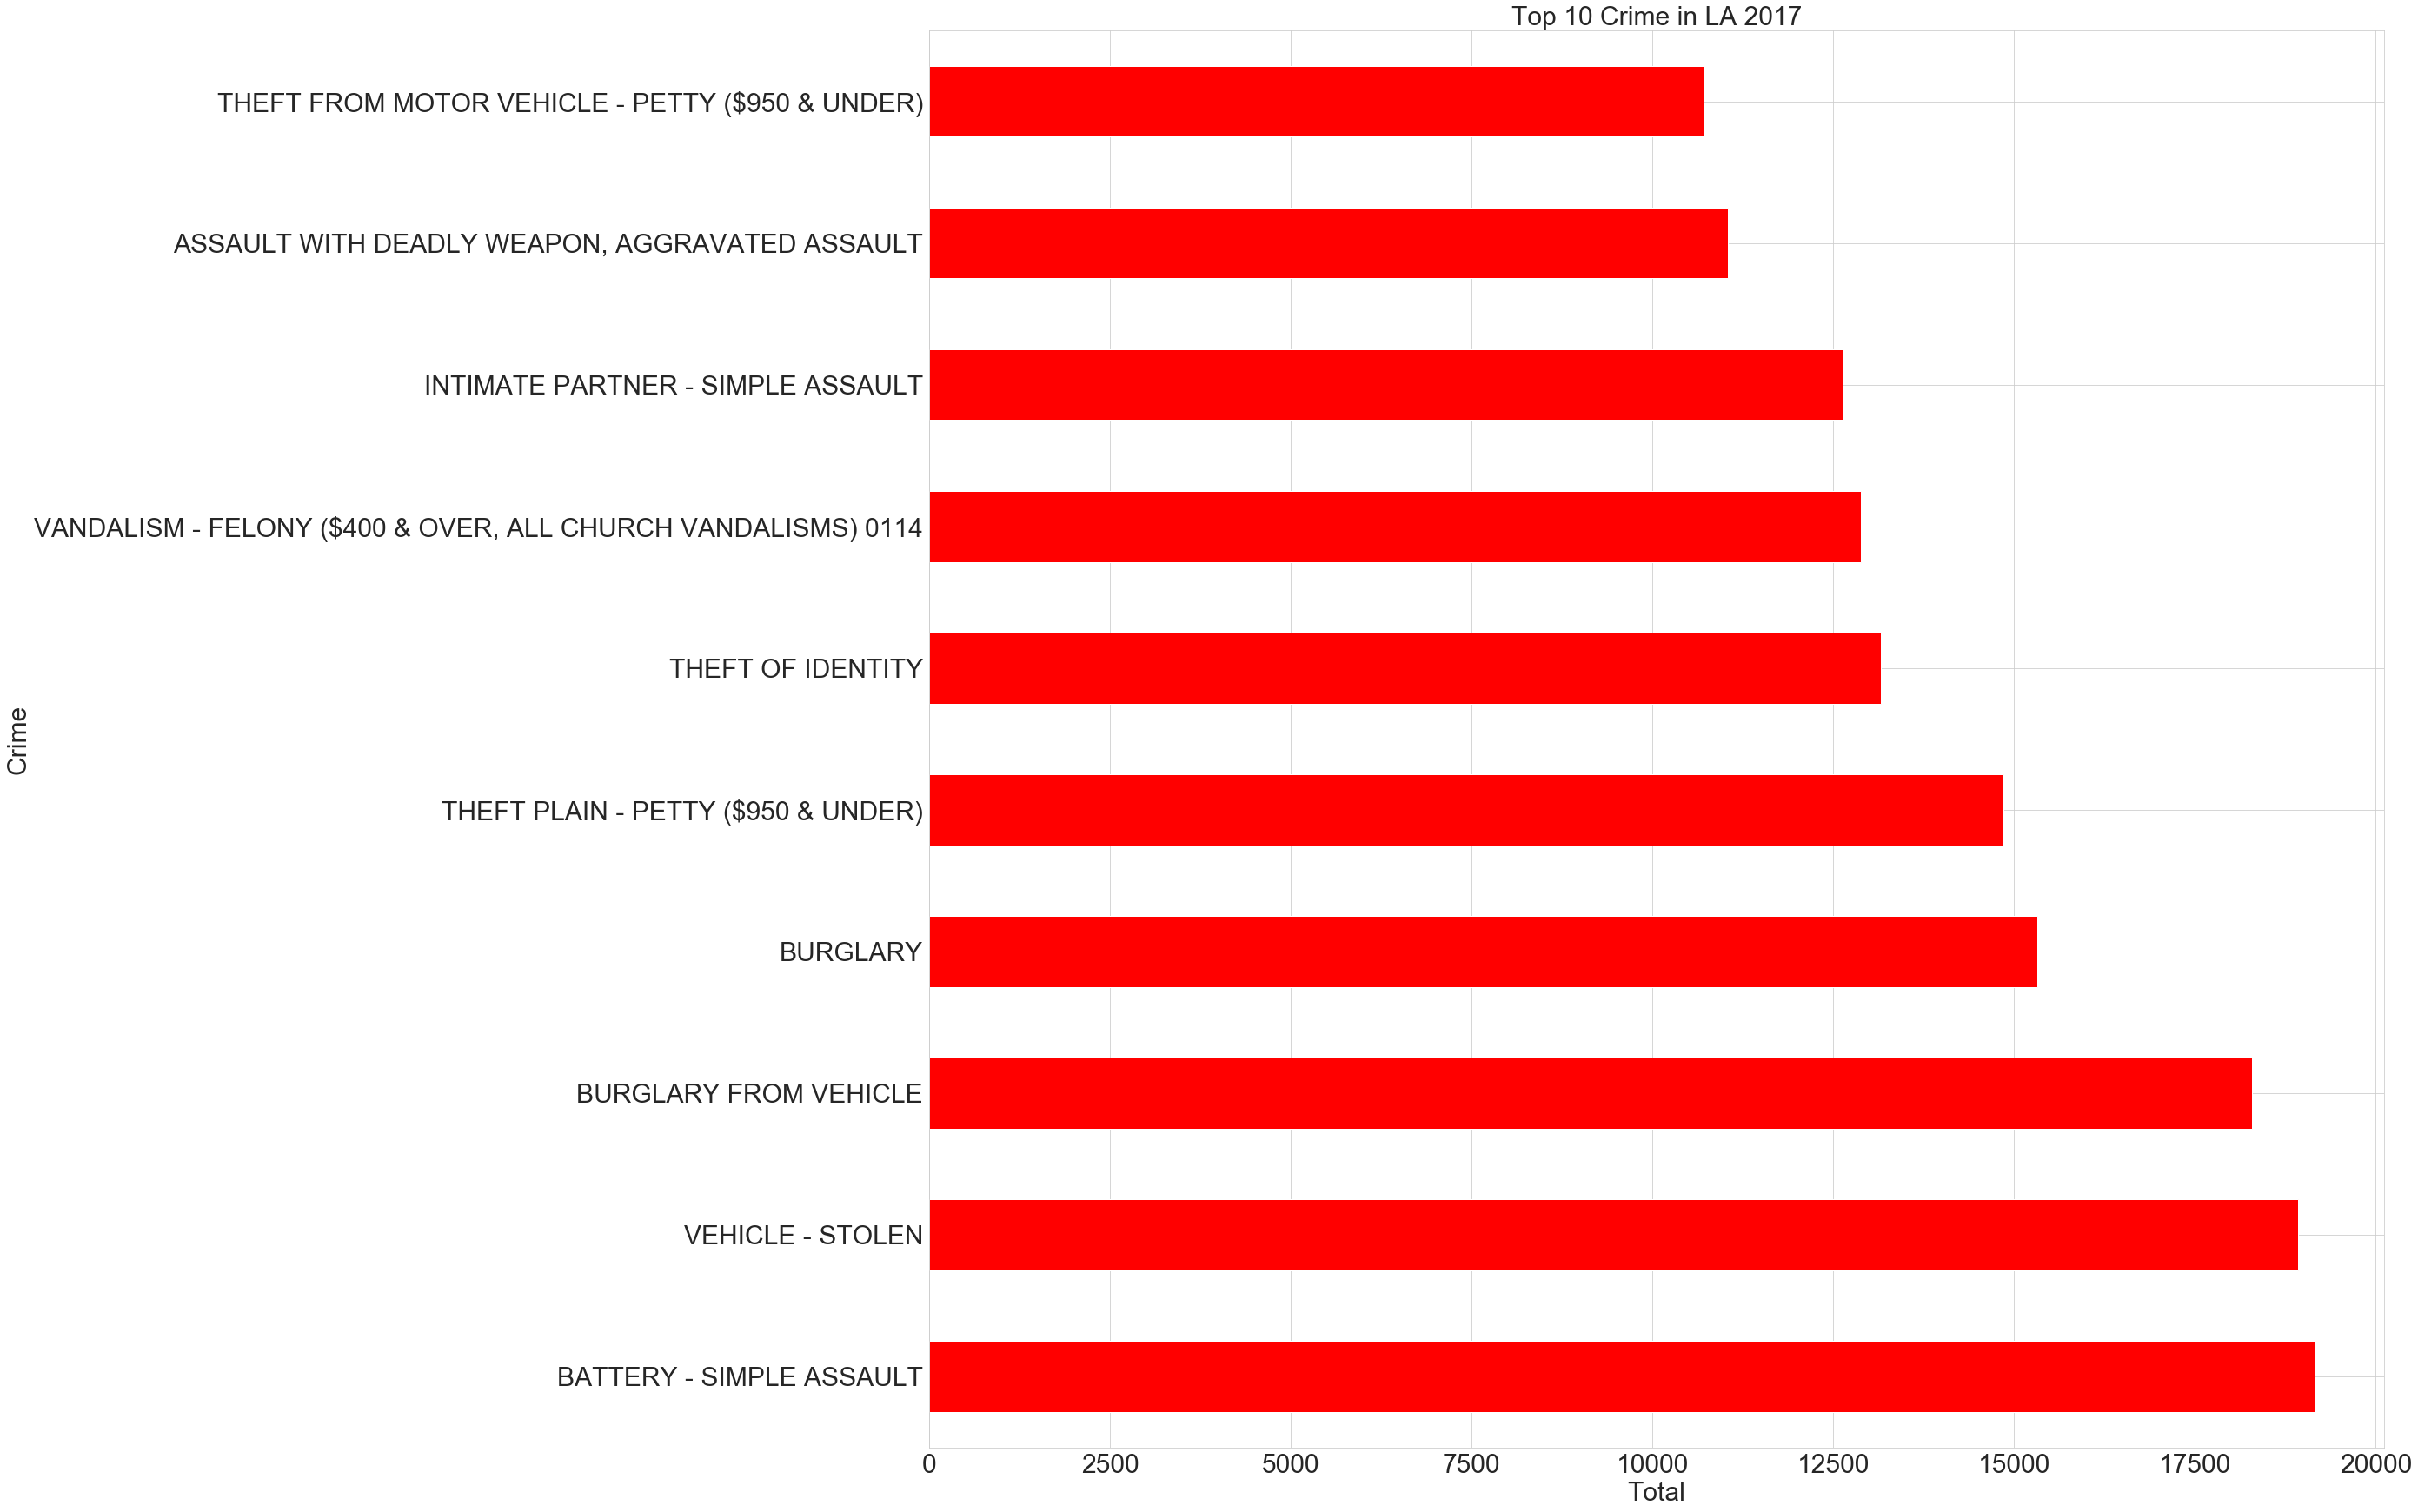

In [13]:
fg, ax = plt.subplots(figsize = (30,30))
_ = top_crime.plot(kind = 'barh', color = 'red')
plt.title('Top 10 Crime in LA 2017', size = 30)
plt.xlabel("Total", size = 30)
plt.ylabel("Crime", size = 30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

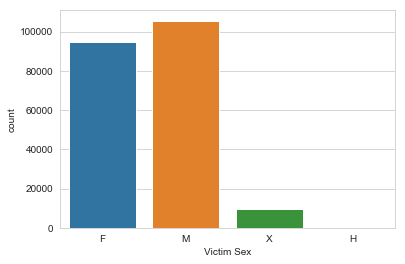

In [14]:
sns.countplot(x = 'Victim Sex', data = crime)

In [15]:
age_victim = crime.groupby('Victim Age')['Victim Age'].count().sort_values(ascending = False)
age_victim = pd.DataFrame(age_victim)
age_victim.columns = ['Total']
age_victim.reset_index(inplace=True)
age_victim = age_victim.sort_values(['Victim Age', 'Total'], ascending=[True, False])

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

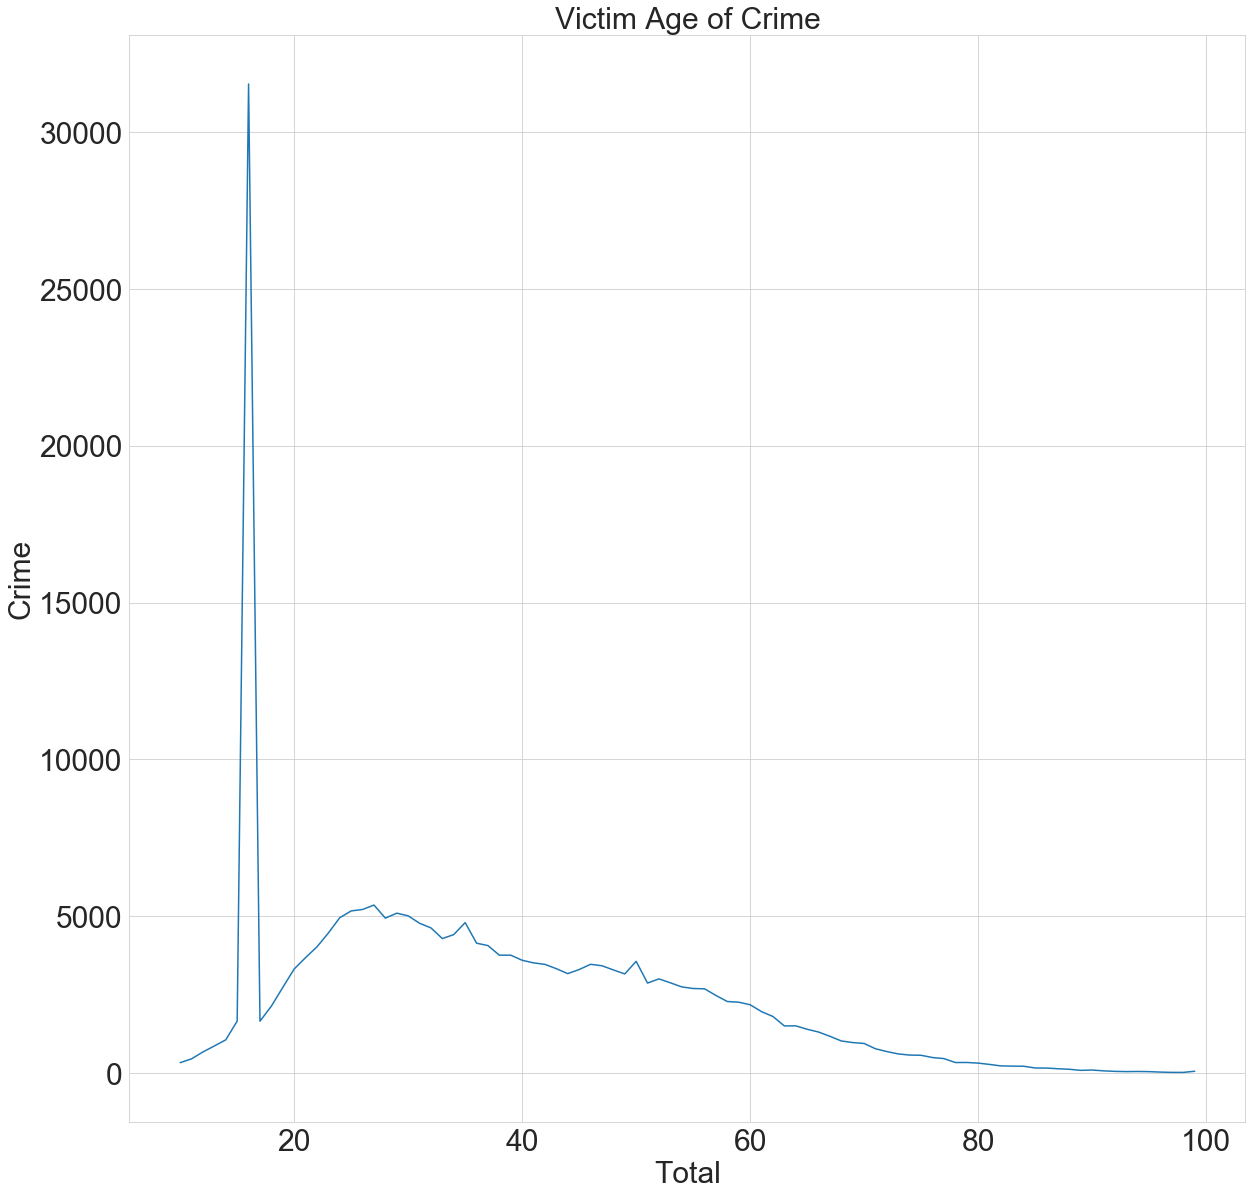

In [16]:
fg, ax = plt.subplots(figsize = (20,20))
_ = sns.lineplot(x = 'Victim Age', y = 'Total', data = age_victim)
plt.title('Victim Age of Crime', size = 30)
plt.xlabel("Total", size = 30)
plt.ylabel("Crime", size = 30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

In [17]:
bins = [0, 22, 45, 65, 100]
group = ['Teenager', 'Young Adult', 'Middle Age', 'Old']
crime['Victim Group'] = pd.cut(crime['Victim Age'], bins, labels = group) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
crime

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Year,Month,Weekday,Victim Group
572,172008853,2017-04-06,10/15/2010,1200,20,Olympic,2026,354,THEFT OF IDENTITY,0100 0928,...,NaN,NaN,NaN,400 S CATALINA ST,NaN,"(34.0674, -118.2954)",2017,Apr,Thursday,Young Adult
575,172108860,2017-04-03,07/03/2010,2000,21,Topanga,2128,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0503 0504 0505 0522 0542 0443,...,860.0,NaN,NaN,20400 SATICOY ST,NaN,"(34.212, -118.5754)",2017,Apr,Monday,Teenager
576,172111385,2017-05-19,01/01/2010,1200,21,Topanga,2177,121,"RAPE, FORCIBLE",2000 0519 1813,...,NaN,NaN,NaN,21500 CALIFA ST,NaN,"(34.1773, -118.5988)",2017,May,Friday,Teenager
207237,171004090,2017-01-02,04/06/2010,1200,10,West Valley,1019,354,THEFT OF IDENTITY,1822 1501,...,NaN,NaN,NaN,7500 HASKELL AV,NaN,"(34.2067, -118.4749)",2017,Jan,Monday,Young Adult
207238,171004488,2017-01-11,04/26/2010,1400,10,West Valley,1003,354,THEFT OF IDENTITY,0377 1822,...,NaN,NaN,NaN,18600 SATICOY ST,NaN,"(34.2084, -118.5382)",2017,Jan,Wednesday,Young Adult
207240,171204264,2017-01-04,12/26/2010,1200,12,77th Street,1208,822,NaN,0943 1501,...,998.0,NaN,NaN,FIGUEROA,48TH,"(33.9992, -118.2827)",2017,Jan,Wednesday,Teenager
207242,171211307,2017-04-11,01/01/2010,1100,12,77th Street,1255,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0522,...,860.0,NaN,NaN,75TH ST,VERMONT AV,"(33.9719, -118.2916)",2017,Apr,Tuesday,Teenager
207243,171213099,2017-05-07,05/06/2010,2130,12,77th Street,1242,330,BURGLARY FROM VEHICLE,1300 0329 0344 1609 0321,...,NaN,NaN,NaN,6300 7TH AV,NaN,"(33.9827, -118.3245)",2017,May,Sunday,NaN
207245,171310766,2017-04-21,12/05/2010,1200,13,Newton,1353,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 0352 1221 1202,...,NaN,NaN,NaN,700 E VERNON AV,NaN,"(34.0039, -118.2635)",2017,Apr,Friday,Middle Age
207246,171406711,2017-02-18,02/01/2010,1400,14,Pacific,1445,354,THEFT OF IDENTITY,NaN,...,NaN,NaN,NaN,12500 WASHINGTON PL,NaN,"(33.9977, -118.4339)",2017,Feb,Saturday,Young Adult


In [19]:
group_vic = age_victim = crime.groupby(['Crime Code Description', 'Victim Group'])['Victim Group'].count()

In [20]:
group_vic = pd.DataFrame(group_vic)

In [21]:
group_vic.columns = ['Total']
group_vic.reset_index(inplace=True)

In [40]:
group_vic

,Crime Code Description,Victim Group,Total
0,ABORTION/ILLEGAL,Young Adult,1
1,ARSON,Teenager,49
2,ARSON,Young Adult,102
3,ARSON,Middle Age,93
4,ARSON,Old,18
5,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,Teenager,47
6,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,Young Adult,26
7,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,Middle Age,4
8,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Teenager,2126
9,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Young Adult,5609
